In [25]:
from finches import epsilon_to_FHtheory, epsilon_calculation

from finches.forcefields.calvados import calvados_model
from finches.forcefields.mPiPi import mPiPi_model

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

**NOTE** The user can titratate the following conditions to build homotypic phase diagrams:

- epsilon_to_FHtheory.build_SALT_dependent_phase_diagrams
- epsilon_to_FHtheory.build_PH_dependent_phase_diagrams
- epsilon_to_FHtheorybuild_DIELECTRIC_dependent_phase_diagrams

### Build SALT dependent phase dyagram

Epsilon values
test_IDR 0.00 -9.114131852849944
test_IDR 0.05 -10.642595303634184
test_IDR 0.10 -10.928721344457859
test_IDR 0.20 -11.17414926510202
test_IDR 0.30 -11.286896609246625


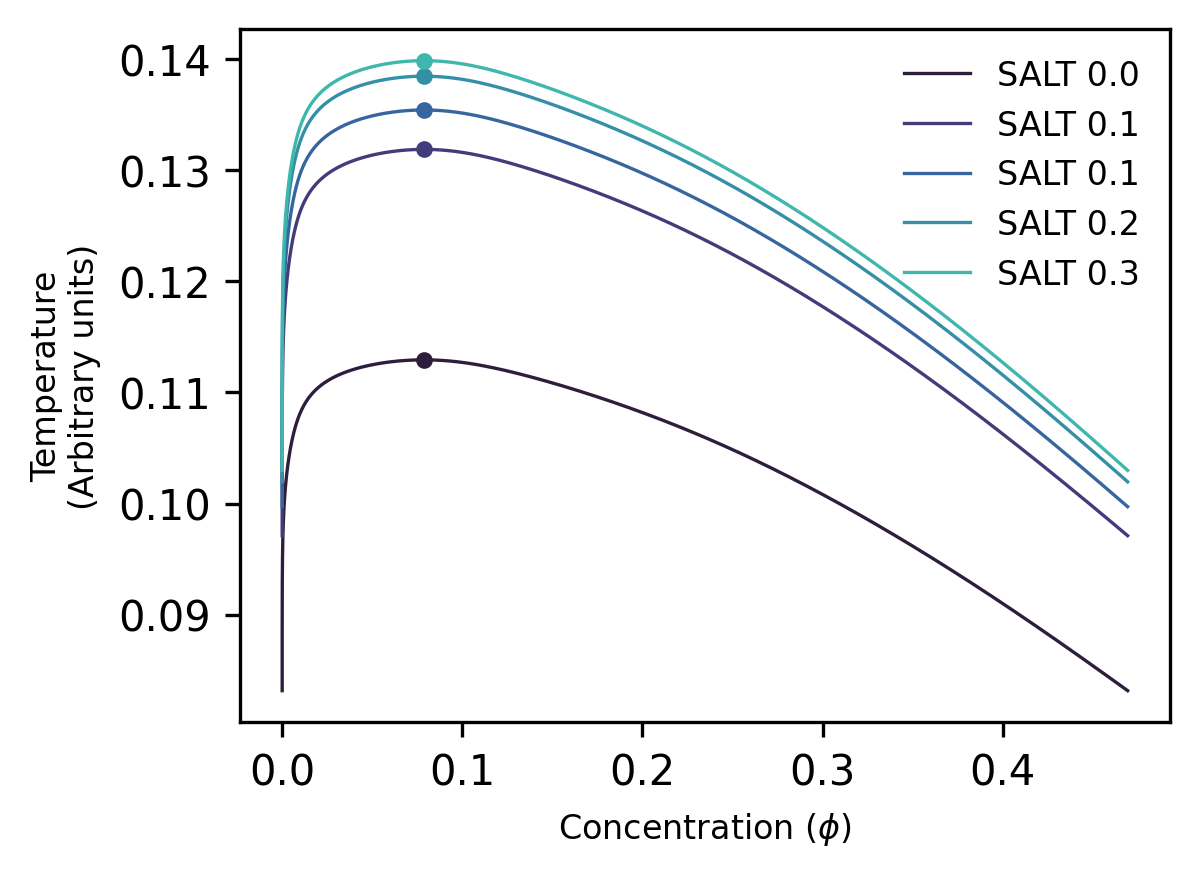

In [26]:
test_IDR = 'GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF'

# initialize forcefild model
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')
CALVADOS2_model = calvados_model('CALVADOS2')

# intialize matrix constructor with model
X_local = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model) 

[condition_list, out_diagrams, out_epsilons] = epsilon_to_FHtheory.build_SALT_dependent_phase_diagrams(test_IDR, X_local, [0,0.05,0.1,0.2,0.3])

##########################################################
### --------------- Ploting of Diagram --------------- ###
##########################################################

f, ax = plt.subplots(1,1 ,figsize=(4, 3), dpi=300, facecolor='w', edgecolor='k')
c_indx=0
colors = sns.color_palette('mako')
print('Epsilon values')
for ci, conc in enumerate(condition_list):

    print('test_IDR %.2f' % (conc), out_epsilons[conc])
    XOUT = out_diagrams[conc]

    ax.plot(XOUT[0], XOUT[3],'-', color=colors[c_indx],linewidth=0.8)
    ax.plot(XOUT[1],XOUT[3],'-', color=colors[c_indx],linewidth=0.8, label='SALT %.1f' % (conc))   
    ax.plot(XOUT[2][0], XOUT[2][1],'.', color=colors[c_indx],linewidth=0.5, ms=8,  mew=0)
    c_indx+=1

ax.set_xlabel(r'Concentration ($\phi$)', fontsize=8)
ax.set_ylabel('Temperature\n(Arbitrary units)', fontsize=8)
ax.legend(loc='upper right', fancybox=True, fontsize=8,edgecolor=None, framealpha=0)